In [1]:
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

nlp = spacy.load("en_core_web_sm")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## POS Tag

In [2]:
def load_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
    return pd.DataFrame(lines, columns=['text'])

def prepare_data(gloss_path, text_path):
  asl_df = load_text_file(gloss_path)
  text_df = load_text_file(text_path)
  asl_df.columns = ['gloss']
  df = pd.concat([text_df, asl_df], axis=1)
  # Strip spaces from the start and end of each sentence in the 'text' and 'gloss' column
  df['text'] = df['text'].apply(lambda x: x.strip() if pd.notnull(x) else '')
  df['gloss'] = df['gloss'].apply(lambda x: x.strip() if pd.notnull(x) else '')
  return df

def difference_between_gloss_and_text_count(df):
  df['text_count'] = df['text'].apply(lambda x: len(x.split()))
  df['gloss_count'] = df['gloss'].apply(lambda x: len(x.split()))
  df['count_difference'] = df['text_count'] - df['gloss_count']
  average_difference = df['count_difference'].mean()
  plt.figure(figsize=(10, 6))
  plt.hist(df['count_difference'], bins=range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 1, 1), alpha=0.7, color='skyblue', edgecolor='black')
  plt.xlabel('Difference Between Gloss Count and Text Count')
  plt.ylabel('Number of Sentences')
  plt.title('Distribution of Difference Between Gloss Count and Text Count')
  plt.xticks(range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 2, 1))
  plt.grid(axis='y', linestyle='--')
  plt.show()

def analyze_complexity(text):
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    num_tokens = len(doc)
    pos_counts = Counter(token.pos_ for token in doc)
    return num_sentences, num_tokens, dict(pos_counts)

def compare_complexity(df):
  df['text_complexity'] = df['text'].apply(analyze_complexity)
  df['gloss_complexity'] = df['gloss'].apply(analyze_complexity)
  text_complexity_columns = df['text_complexity'].apply(pd.Series)
  text_complexity_columns.columns = ['text_num_sentences', 'text_num_tokens', 'text_pos_counts']
  gloss_complexity_columns = df['gloss_complexity'].apply(pd.Series)
  gloss_complexity_columns.columns = ['gloss_num_sentences', 'gloss_num_tokens', 'gloss_pos_counts']
  df = pd.concat([df, text_complexity_columns, gloss_complexity_columns], axis=1)
  df.drop(['text_complexity', 'gloss_complexity'], axis=1, inplace=True)
  '''
  average_text_tokens = df['text_num_tokens'].mean()
  average_gloss_tokens = df['gloss_num_tokens'].mean()
  categories = ['Text', 'Gloss']
  averages = [average_text_tokens, average_gloss_tokens]
  '''
  text_pos_aggregate = defaultdict(int)
  gloss_pos_aggregate = defaultdict(int)

  for row in df.itertuples():
    for pos, count in row.text_pos_counts.items():
        text_pos_aggregate[pos] += count
    for pos, count in row.gloss_pos_counts.items():
        gloss_pos_aggregate[pos] += count

  pos_comparison_df = pd.DataFrame([text_pos_aggregate, gloss_pos_aggregate], index=['Text', 'Gloss']).T

  pos_comparison_df.plot(kind='bar', figsize=(14, 7), width=0.8)
  plt.title('Comparison of POS Tags between Text and Gloss')
  plt.xlabel('POS Tags')
  plt.ylabel('Counts')
  plt.xticks(rotation=45)
  plt.legend(title='Source')
  plt.grid(axis='y', linestyle='--')
  plt.tight_layout()

  plt.show()

  return pos_comparison_df

In [3]:
df_aslg_01 = prepare_data('/Users/hamdan/Downloads/corpus_0001/corpus_0001.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0001/corpus_0001.clean.en.txt')
df_aslg_02 = prepare_data('/Users/hamdan/Downloads/corpus_0002/corpus_0002.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0002/corpus_0002.clean.en.txt')
df_aslg_03 = prepare_data('/Users/hamdan/Downloads/corpus_0003/corpus_0003.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0003/corpus_0003.clean.en.txt')
df_aslg_04 = prepare_data('/Users/hamdan/Downloads/corpus_0004/corpus_0004.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0004/corpus_0004.clean.en.txt')
df_aslg_05 = prepare_data('/Users/hamdan/Downloads/corpus_0005/corpus_0005.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0005/corpus_0005.clean.en.txt')
df_aslg_06 = prepare_data('/Users/hamdan/Downloads/corpus_0006/corpus_0006.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0006/corpus_0006.clean.en.txt')
df_aslg_07 = prepare_data('/Users/hamdan/Downloads/corpus_0007/corpus_0007.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0007/corpus_0007.clean.en.txt')
df_aslg_08 = prepare_data('/Users/hamdan/Downloads/corpus_0008/corpus_0008.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0008/corpus_0008.clean.en.txt')
df_aslg_09 = prepare_data('/Users/hamdan/Downloads/corpus_0009/corpus_0009.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0009/corpus_0009.clean.en.txt')
df_aslg_10 = prepare_data('/Users/hamdan/Downloads/corpus_0010/corpus_0010.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0010/corpus_0010.clean.en.txt')
df_aslg_11 = prepare_data('/Users/hamdan/Downloads/corpus_0011/corpus_0011.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0011/corpus_0011.clean.en.txt')
df_aslg_12 = prepare_data('/Users/hamdan/Downloads/corpus_0012/corpus_0012.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0012/corpus_0012.clean.en.txt')
df_aslg_13 = prepare_data('/Users/hamdan/Downloads/corpus_0013/corpus_0013.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0013/corpus_0013.clean.en.txt')
df_aslg_14 = prepare_data('/Users/hamdan/Downloads/corpus_0014/corpus_0014.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0014/corpus_0014.clean.en.txt')
df_aslg_15 = prepare_data('/Users/hamdan/Downloads/corpus_0015/corpus_0015.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0015/corpus_0015.clean.en.txt')
df_aslg_16 = prepare_data('/Users/hamdan/Downloads/corpus_0016/corpus_0016.clean.asl.txt', '/Users/hamdan/Downloads/corpus_0016/corpus_0016.clean.en.txt')

In [4]:
df_gold_text = prepare_data('/Users/hamdan/Downloads/corpus_0008/gloss.txt', '/Users/hamdan/Downloads/corpus_0008/text.txt')

In [5]:
frames = [df_aslg_02, df_aslg_03, df_aslg_04, df_aslg_05, df_aslg_06, df_aslg_07, df_aslg_08, df_aslg_09, df_aslg_10, df_aslg_11, df_aslg_12, df_aslg_13, df_aslg_14, df_aslg_15, df_aslg_16]
all_data_df = pd.concat(frames)

random_sample_df = all_data_df.sample(n=118, random_state=42)

random_sample_df.reset_index(drop=True, inplace=True)


In [6]:
df_aslg_01 = df_aslg_01.sample(n=118, random_state=42)

df_aslg_01.reset_index(drop=True, inplace=True)

In [7]:
from datasets import load_dataset
aslg_pc12_dataset = load_dataset("aslg_pc12")

aslg_pc12_dataset = pd.DataFrame(aslg_pc12_dataset['train'])

df_aslg_hf = aslg_pc12_dataset.sample(n=118, random_state=42)

df_aslg_hf.reset_index(drop=True, inplace=True)

In [8]:
df_gold_phoenix = prepare_data('/Users/hamdan/Downloads/corpus_0008/pheonix_gloss.txt', '/Users/hamdan/Downloads/corpus_0008/pheonix_text.txt')

df_gold_phoenix = df_gold_phoenix.sample(n=118, random_state=42)

df_gold_phoenix.reset_index(drop=True, inplace=True)

nlp_de = spacy.load("de_core_news_sm")

def analyze_complexity_de(text):
    doc = nlp_de(text)
    num_sentences = len(list(doc.sents))
    num_tokens = len(doc)
    pos_counts = Counter(token.pos_ for token in doc)
    return num_sentences, num_tokens, dict(pos_counts)

def compare_complexity(df):
  df['text_complexity'] = df['text'].apply(analyze_complexity_de)
  df['gloss_complexity'] = df['gloss'].apply(analyze_complexity_de)
  text_complexity_columns = df['text_complexity'].apply(pd.Series)
  text_complexity_columns.columns = ['text_num_sentences', 'text_num_tokens', 'text_pos_counts']
  gloss_complexity_columns = df['gloss_complexity'].apply(pd.Series)
  gloss_complexity_columns.columns = ['gloss_num_sentences', 'gloss_num_tokens', 'gloss_pos_counts']
  df = pd.concat([df, text_complexity_columns, gloss_complexity_columns], axis=1)
  df.drop(['text_complexity', 'gloss_complexity'], axis=1, inplace=True)
  '''
  average_text_tokens = df['text_num_tokens'].mean()
  average_gloss_tokens = df['gloss_num_tokens'].mean()
  categories = ['Text', 'Gloss']
  averages = [average_text_tokens, average_gloss_tokens]
  '''
  text_pos_aggregate = defaultdict(int)
  gloss_pos_aggregate = defaultdict(int)

  for row in df.itertuples():
    for pos, count in row.text_pos_counts.items():
        text_pos_aggregate[pos] += count
    for pos, count in row.gloss_pos_counts.items():
        gloss_pos_aggregate[pos] += count

  pos_comparison_df = pd.DataFrame([text_pos_aggregate, gloss_pos_aggregate], index=['Text', 'Gloss']).T

  pos_comparison_df.plot(kind='bar', figsize=(14, 7), width=0.8)
  plt.title('Comparison of POS Tags between Text and Gloss')
  plt.xlabel('POS Tags')
  plt.ylabel('Counts')
  plt.xticks(rotation=45)
  plt.legend(title='Source')
  plt.grid(axis='y', linestyle='--')
  plt.tight_layout()

  plt.show()

  return pos_comparison_df


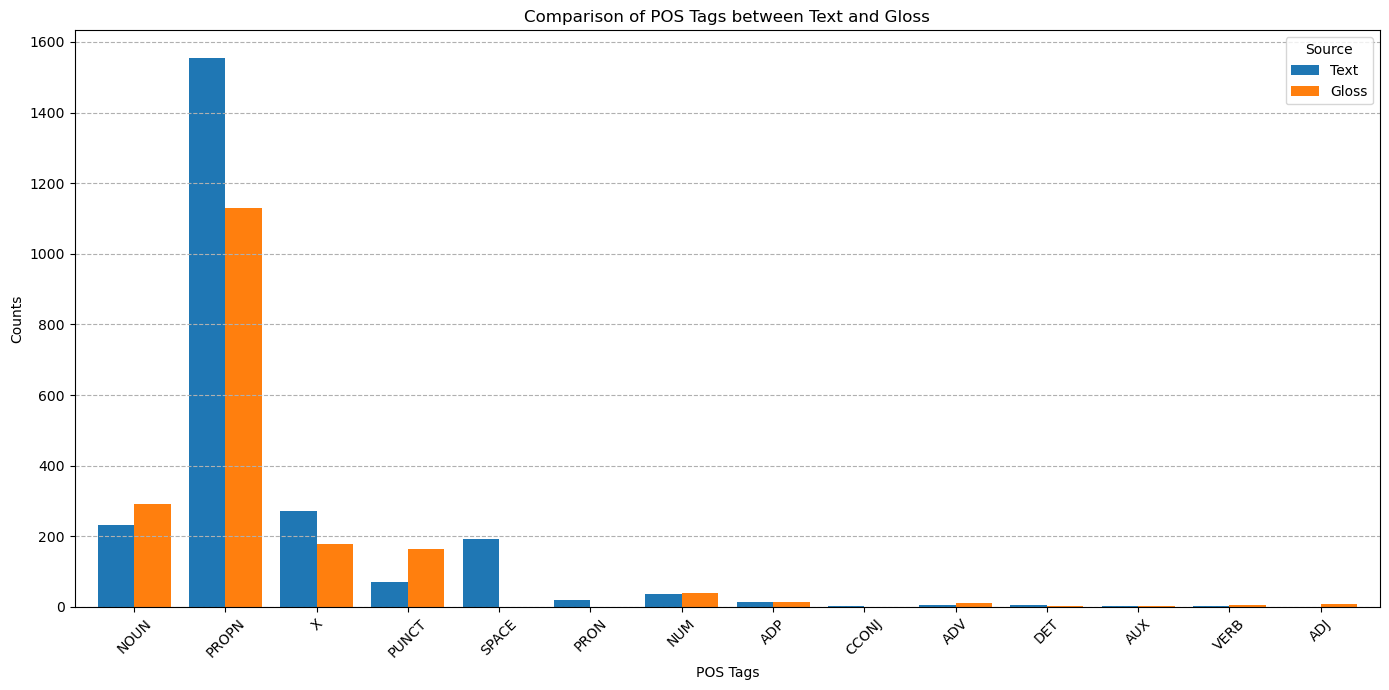

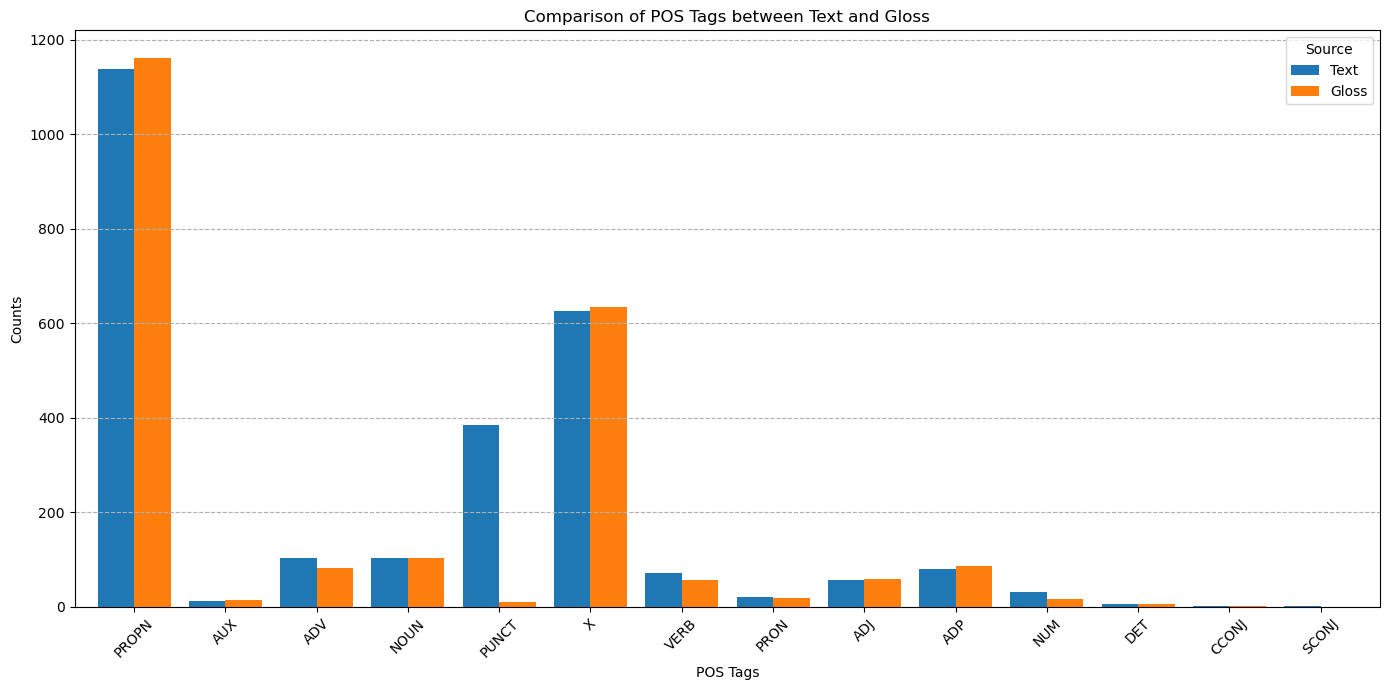

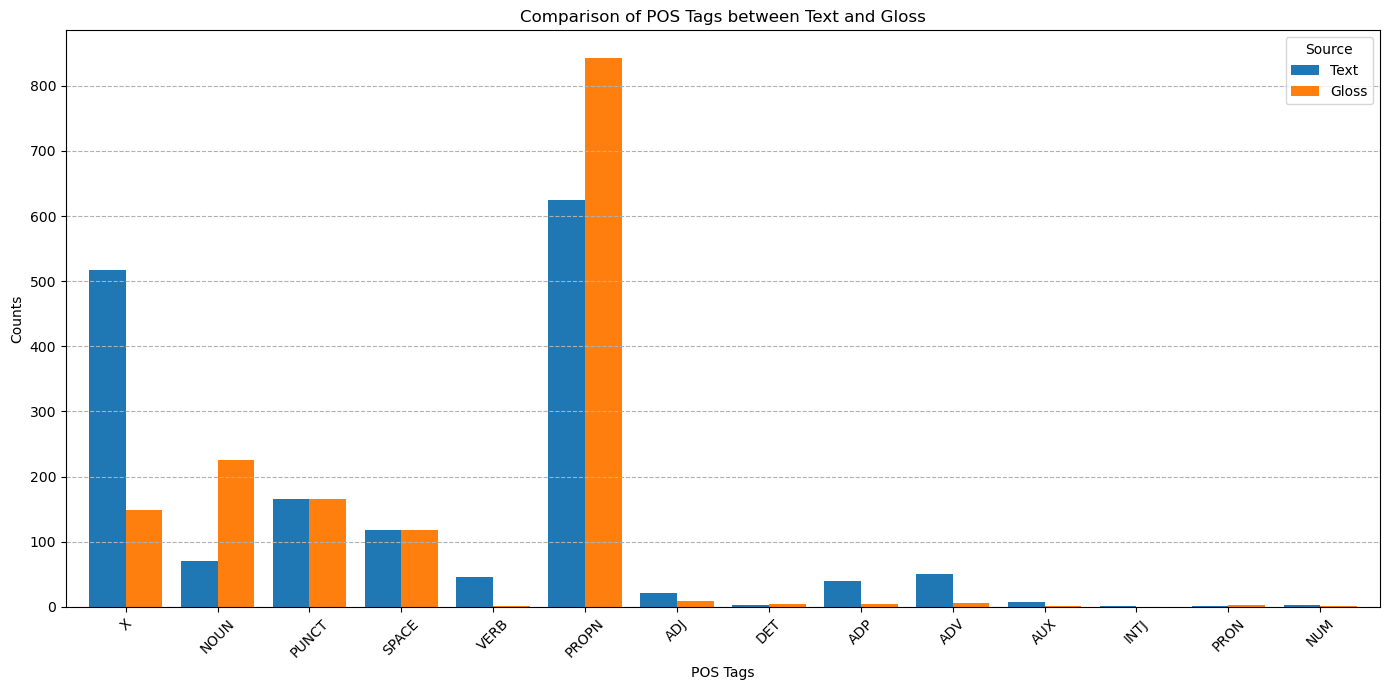

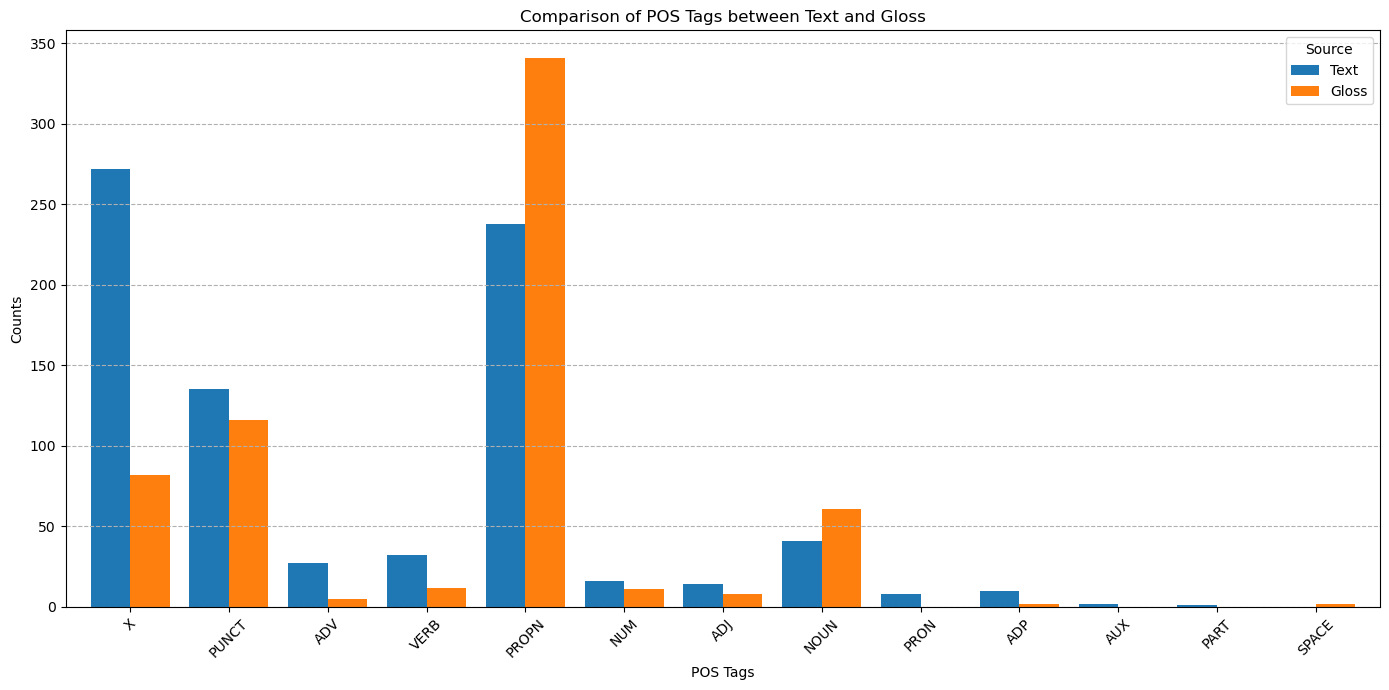

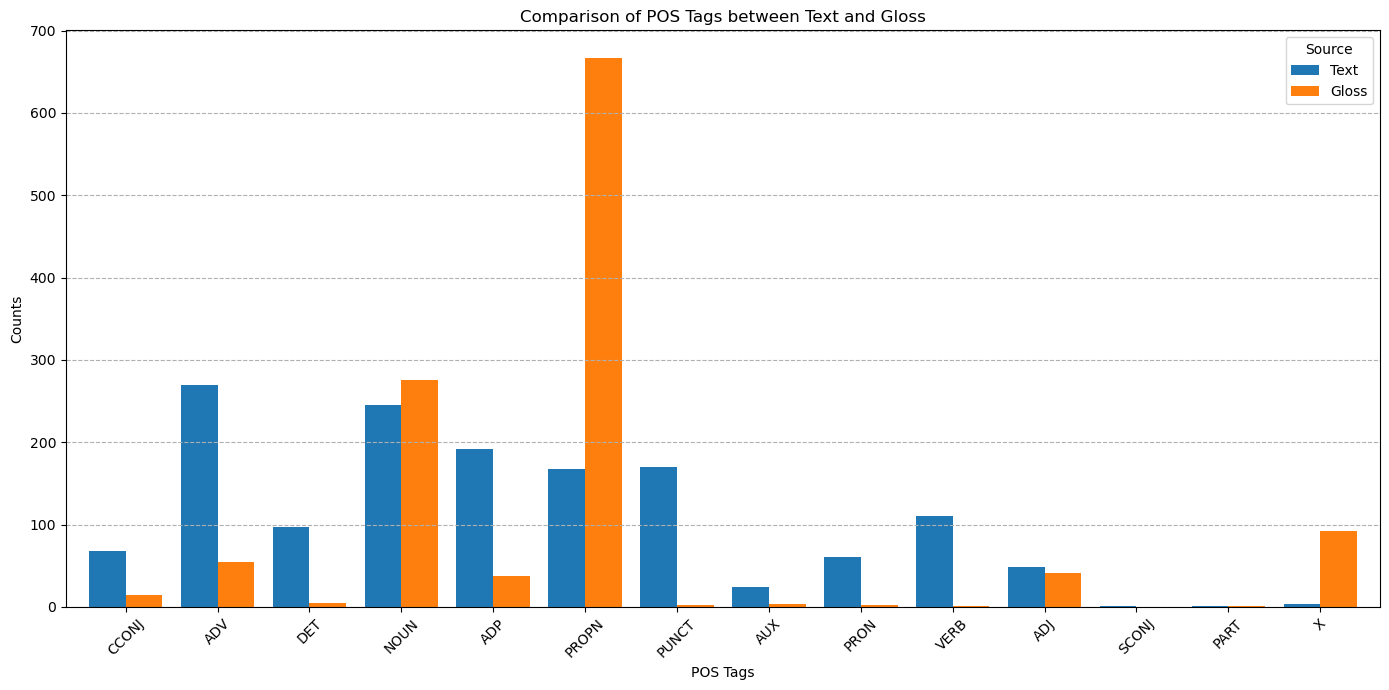

In [9]:
pos_tag_comparision_aslg_01 = compare_complexity(df_aslg_01)
pos_tag_comparision_aslg_02_to_16_random = compare_complexity(random_sample_df)
pos_tag_comparision_aslg_hf = compare_complexity(df_aslg_hf)
pos_tag_comparision_golden = compare_complexity(df_gold_text)
pos_tag_comparision_phoenix = compare_complexity(df_gold_phoenix)

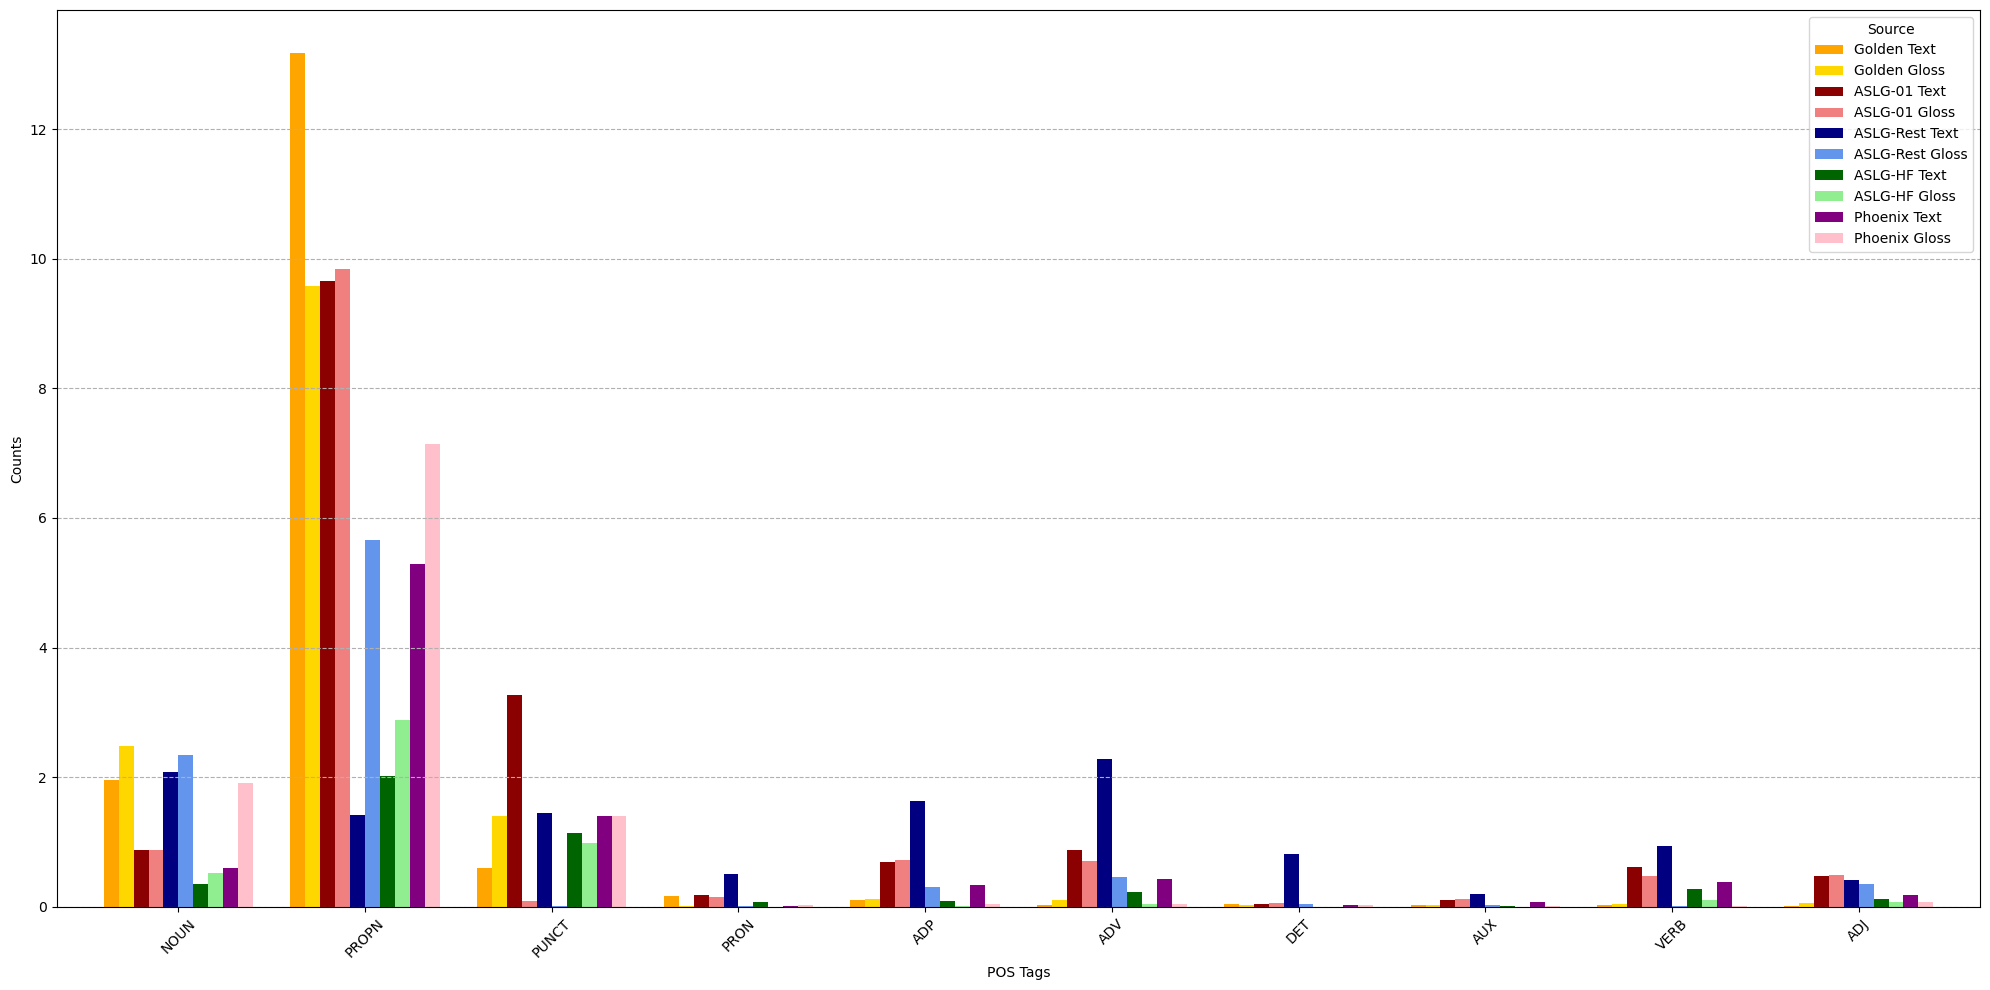

In [10]:
combined_df = pd.concat([
    pos_tag_comparision_aslg_01, 
    pos_tag_comparision_aslg_02_to_16_random, 
    pos_tag_comparision_phoenix,
    pos_tag_comparision_golden,
    pos_tag_comparision_aslg_hf
], axis=1)

combined_df = combined_df.fillna(0)

tags_to_remove = ['X', 'SIM', 'INTJ', 'SPACE', 'NUM', 'SYM', 'SCONJ', 'PART', 'CCONJ']
combined_df = combined_df.drop(tags_to_remove, errors='ignore')

combined_df.columns = [
    'Golden Text', 'Golden Gloss',
    'ASLG-01 Text', 'ASLG-01 Gloss', 
    'ASLG-Rest Text', 'ASLG-Rest Gloss', 
    'ASLG-HF Text', 'ASLG-HF Gloss',
    'Phoenix Text', 'Phoenix Gloss',
]

combined_df = combined_df / 118

colors = ['orange', 'gold', 'darkred', 'lightcoral', 'navy', 'cornflowerblue', 'darkgreen', 'lightgreen', 'purple', 'pink']

ax = combined_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=colors)

plt.xlabel('POS Tags')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Edit Distance

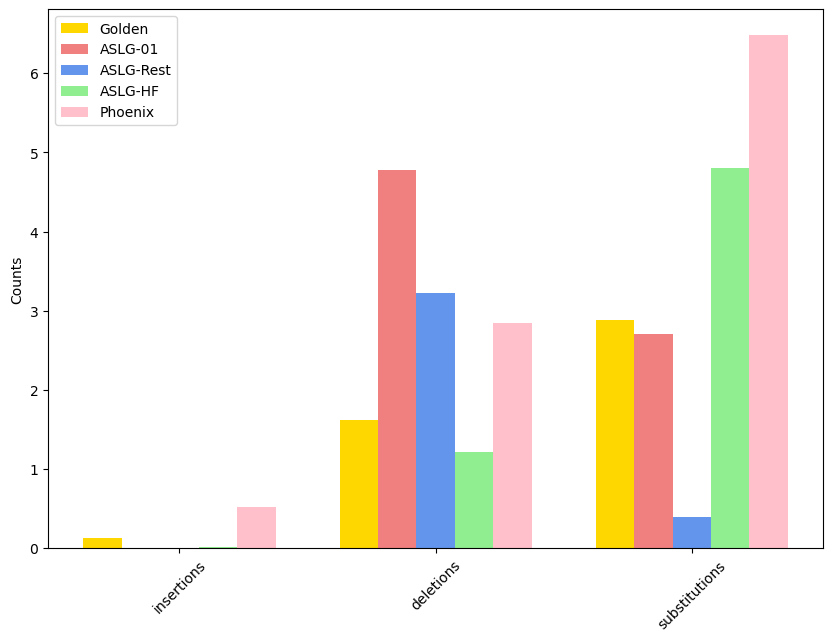

In [12]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from datasets import load_dataset

def categorize_word_edits(source, edited):
    source = source.lower()
    edited = edited.lower()
    
    source_words = source.split()
    edited_words = edited.split()
    
    source_count = Counter(source_words)
    edited_count = Counter(edited_words)
    
    edits = {'insertions': 0, 'deletions': 0, 'substitutions': 0}
    
    for word in set(edited_words + source_words):
        count_diff = edited_count[word] - source_count[word]
        if count_diff > 0:
            edits['insertions'] += count_diff
        elif count_diff < 0:
            edits['deletions'] -= count_diff  # Make positive
    
    edits['substitutions'] = min(edits['insertions'], edits['deletions'])
    edits['insertions'] -= edits['substitutions']
    edits['deletions'] -= edits['substitutions']
    
    return edits

df_gold = pd.DataFrame(df_gold_text) # Golden Color
df_aslg_01 = pd.DataFrame(df_aslg_01) #darkred
df_aslg_rest = pd.DataFrame(random_sample_df) #navy
df_aslg_hf = pd.DataFrame(df_aslg_hf) #darkgreen
df_pheonix = pd.DataFrame(df_gold_phoenix) #purple

total_edits_gold = {'insertions': 0, 'deletions': 0, 'substitutions': 0}
for _, row in df_gold.iterrows():
    source = row['text']
    edited = row['gloss']
    edits = categorize_word_edits(source, edited)
    for key in total_edits_gold:
        total_edits_gold[key] += edits[key]

total_edits_aslg_01 = {'insertions': 0, 'deletions': 0, 'substitutions': 0}
for _, row in df_aslg_01.iterrows():
    source = row['text']
    edited = row['gloss']
    edits = categorize_word_edits(source, edited)
    for key in total_edits_aslg_01:
        total_edits_aslg_01[key] += edits[key]

total_edits_rest = {'insertions': 0, 'deletions': 0, 'substitutions': 0}
for _, row in df_aslg_rest.iterrows():
    source = row['text']
    edited = row['gloss']
    edits = categorize_word_edits(source, edited)
    for key in total_edits_rest:
        total_edits_rest[key] += edits[key]

total_edits_hf = {'insertions': 0, 'deletions': 0, 'substitutions': 0}
for _, row in df_aslg_hf.iterrows():
    source = row['text']
    edited = row['gloss']
    edits = categorize_word_edits(source, edited)
    for key in total_edits_hf:
        total_edits_hf[key] += edits[key]

total_edits_phoenix = {'insertions': 0, 'deletions': 0, 'substitutions': 0}
for _, row in df_pheonix.iterrows():
    source = row['text']
    edited = row['gloss']
    edits = categorize_word_edits(source, edited)
    for key in total_edits_phoenix:
        total_edits_phoenix[key] += edits[key]

divisor = 118

result_gold = {key: value / divisor for key, value in total_edits_gold.items()}
result_aslg_01 = {key: value / divisor for key, value in total_edits_aslg_01.items()}
result_aslg_rest = {key: value / divisor for key, value in total_edits_rest.items()}
result_aslg_hf = {key: value / divisor for key, value in total_edits_hf.items()}
result_pheonix = {key: value / divisor for key, value in total_edits_phoenix.items()}

labels = list(result_gold.keys())
counts_gold = list(result_gold.values())
counts_aslg_01 = list(result_aslg_01.values())
counts_rest = list(result_aslg_rest.values())
counts_hf = list(result_aslg_hf.values())
counts_pheonix = list(result_pheonix.values())

x = list(range(len(labels)))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x, counts_gold, width, label='Golden', color='gold')
rects2 = ax.bar([p + width for p in x], counts_aslg_01, width, label='ASLG-01', color='lightcoral')
rects3 = ax.bar([p + width * 2 for p in x], counts_rest, width, label='ASLG-Rest', color='cornflowerblue')
rects4 = ax.bar([p + width * 3 for p in x], counts_hf, width, label='ASLG-HF', color='lightgreen')
rects5 = ax.bar([p + width * 4 for p in x], counts_pheonix, width, label='Phoenix', color='pink')

ax.set_ylabel('Counts')
ax.set_xticks([p + width * 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.show()
